In [1]:
from neurolib.utils.loadData import Dataset
import os
import numpy as np
import pandas as pd
import scipy as sp
from scipy import stats
import math
from scipy.spatial import distance
from sklearn.cluster import KMeans
from tqdm import tqdm
from itertools import combinations
# import plotting libraries
import matplotlib.pyplot as plt
import seaborn as sns
from nilearn import datasets
from nilearn import plotting
# import nctpy functions
from nctpy.energies import integrate_u, get_control_inputs
from nctpy.metrics import ave_control, modal_control
from nctpy.utils import (
matrix_normalization,
normalize_state,
normalize_weights,
)
from nctpy.plotting import roi_to_vtx, null_plot, surface_plot, add_module_lines, set_plotting_params, reg_plot
import networkx as nx

In [6]:
A = np.loadtxt('/Users/shenxiaoyu/Desktop/NCT/A.txt')

G = nx.from_numpy_matrix(A)
print(f"The graph is {'connected' if nx.is_connected(G) else 'not connected'}.")

The graph is connected.


In [3]:
# strength function
def node_strength(A):
    str = np.sum(A, axis=0)

    return str

In [5]:
ns = node_strength(A)

# Modal Controllability

In [6]:
mc = modal_control(A_norm)
print(mc)

[-0.0538286  -0.04090192 -0.14655749 -0.1293777  -0.12795481 -0.11608223
 -0.01992132 -0.02096449 -0.04074972 -0.03348968 -0.00930755 -0.00472232
 -0.02198695 -0.01888385 -0.03079911 -0.04036464 -0.00179716 -0.00301349
 -0.06312222 -0.05457381 -0.00757988 -0.011023   -0.00546041 -0.0049965
 -0.00204208 -0.00175178 -0.00299677 -0.00258504 -0.00424397 -0.0026039
 -0.00112131 -0.00043974 -0.02859583 -0.01659195 -0.02609586 -0.03317262
 -0.03585138 -0.06057628 -0.012232   -0.01540403 -0.0578947  -0.0657353
 -0.04229136 -0.05412717 -0.04065321 -0.04492344 -0.04384828 -0.04178443
 -0.06743398 -0.03670828 -0.02153293 -0.01412556 -0.0385849  -0.04177779
 -0.0623441  -0.04977117 -0.03826036 -0.02817806 -0.05467201 -0.02783539
 -0.02497002 -0.03473995 -0.02370063 -0.02447709 -0.07711279 -0.08958571
 -0.00738599 -0.00720719 -0.00281625 -0.00363597 -0.06107078 -0.06351345
 -0.00980041 -0.00798056 -0.12208381 -0.10718353 -0.00632025 -0.00910647
 -0.07811794 -0.06961511]


# Average Controllability 

In [7]:
ac = ave_control(A_norm=A_norm, system=system)
print(ac)

[0.44218547 0.43969574 0.45867032 0.45562212 0.45511901 0.45288261
 0.43606267 0.43622183 0.43977613 0.43835172 0.43398944 0.43315491
 0.43631235 0.43568144 0.43813405 0.43977709 0.4326421  0.43285522
 0.44413089 0.44248489 0.433692   0.4343426  0.43326674 0.43317557
 0.43267213 0.43262041 0.43287532 0.43278311 0.43304967 0.43276489
 0.43252443 0.43240465 0.43755766 0.43527419 0.43715254 0.4385759
 0.43906231 0.44377902 0.43484854 0.43549594 0.4434031  0.44502106
 0.44049906 0.44274968 0.43976166 0.44059689 0.44060487 0.44015345
 0.44523373 0.439196   0.43631368 0.43498604 0.43924137 0.43985288
 0.44351608 0.4410635  0.43948278 0.43756778 0.44229563 0.43728049
 0.43698068 0.43856364 0.43669907 0.43687539 0.44751011 0.44997639
 0.4337144  0.43366042 0.43283106 0.43296488 0.44326181 0.44354405
 0.43412056 0.43375424 0.45442022 0.45127572 0.43350159 0.43401229
 0.44630844 0.44465641]


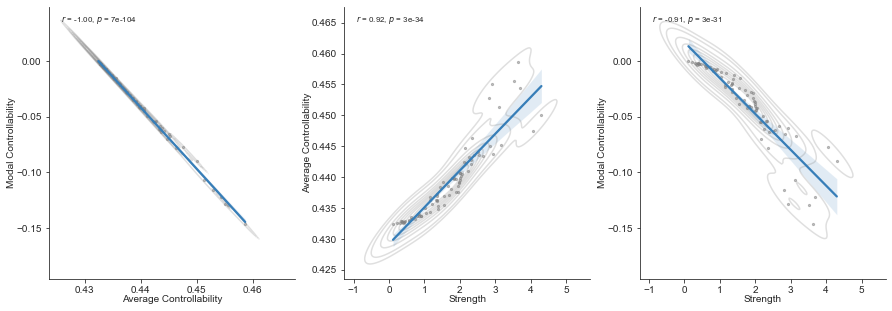

In [8]:
set_plotting_params()
f, ax = plt.subplots(1, 2, figsize=(15, 5))

reg_plot(x=ac, y=mc,
         xlabel='Average Controllability', ylabel='Modal Controllability',
         annotate='pearson', ax=ax[0])

reg_plot(x=ns, y=ac,
         xlabel='Strength', ylabel='Average Controllability',
         annotate='pearson', ax=ax[1])

reg_plot(x=ns, y=mc,
         xlabel='Strength', ylabel='Modal Controllability',
         annotate='pearson', ax=ax[2])

plt.show()

# Control Energy

In [9]:
# define initial and target states as random patterns of activity
np.random.seed(42)  
x0 = np.random.rand(n_nodes, 1)  # initial state
xf = np.random.rand(n_nodes, 1)  # target state

# specify a uniform full control set: all nodes are control nodes
# and all control nodes are assigned equal control weight
control_set = np.eye(n_nodes)

# set parameters
time_horizon = 1  # time horizon (T)
rho = 1  # mixing parameter for state trajectory constraint
trajectory_constraints = np.eye(n_nodes)  # nodes in state trajectory to be constrained

# get the state trajectory (x) and the control inputs (u)
state_trajectory, control_signals, numerical_error = get_control_inputs(
    A_norm=A_norm,
    T=time_horizon,
    B=control_set,
    x0=x0,
    xf=xf,
    system=system,
    rho=rho,
    S=trajectory_constraints,
)


# print errors
thr = 1e-8
# the first numerical error corresponds to the inversion error
print(
    "inversion error = {:.2E} (<{:.2E}={:})".format(
numerical_error[0], thr, numerical_error[0] < thr
)
)
# the second numerical error corresponds to the reconstruction error
print(
"reconstruction error = {:.2E} (<{:.2E}={:})".format(
    numerical_error[1], thr, numerical_error[1] < thr
) )

inversion error = 1.63E-15 (<1.00E-08=True)
reconstruction error = 1.78E-13 (<1.00E-08=True)


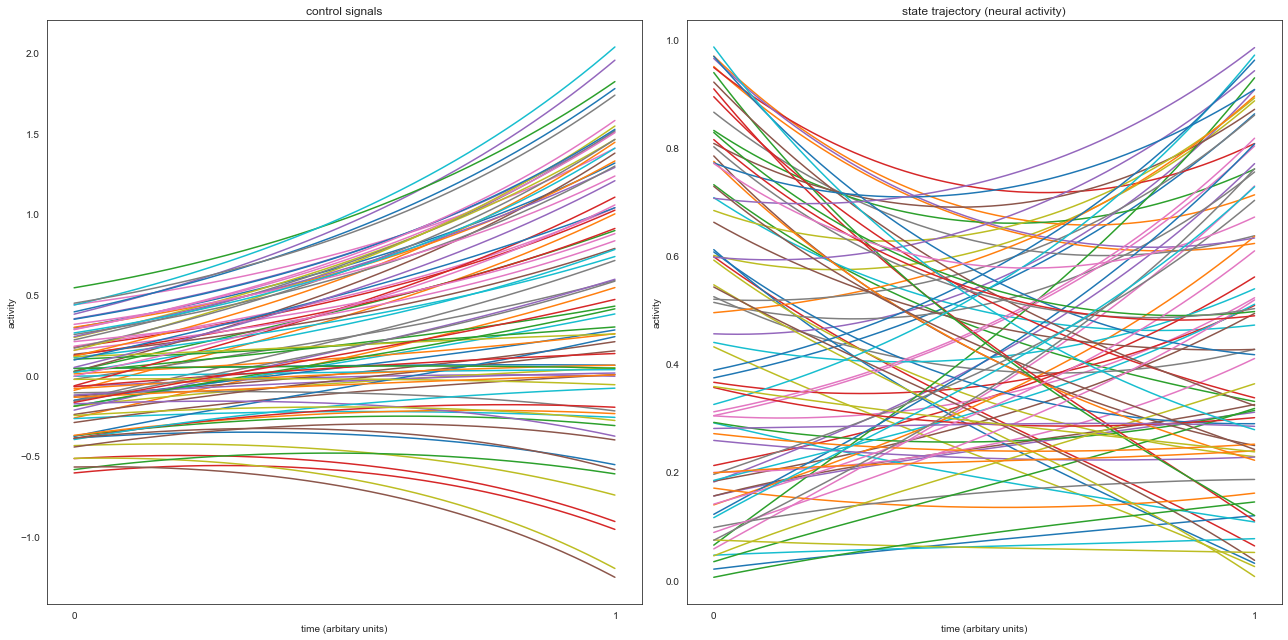

In [10]:
# Visualize state trajectory (x) and control signals(u) 

f, ax = plt.subplots(1, 2, figsize=(18, 9))
# plot control signals for initial state
ax[0].plot(control_signals)
ax[0].set_title('control signals')

# plot state trajectory for initial state
ax[1].plot(state_trajectory)
ax[1].set_title('state trajectory (neural activity)')

for cax in ax.reshape(-1):
    cax.set_ylabel("activity")
    cax.set_xlabel("time (arbitary units)")
    cax.set_xticks([0, state_trajectory.shape[0]])
    cax.set_xticklabels([0, time_horizon])

f.tight_layout()
plt.show()

In [11]:
# integrate control inputs to get control energy
node_energy = integrate_u(control_signals)

# summarize nodal energy to get control energy
energy = np.sum(node_energy)
print(np.round(energy, 2))

24819.5


In [12]:
def compute_opt_control_set(A_norm, x0, xf, rho, S, system=None, T=1, control_size=1, numerical_threshold=1e-8):
    
    results = []
    n_nodes = A_norm.shape[0]
    all_combinations = combinations(range(n_nodes), control_size)
    num_combinations = math.comb(n_nodes, control_size)
    valid_combination_found = False
    

    for comb in tqdm(all_combinations, desc=f"Control size {control_size}", total=num_combinations):
        B = np.eye(n_nodes) * np.random.normal(loc=B_mu, scale=B_sigma, size=(1, n_nodes))
        for i in comb:
            B[i, i] = 1

            _, control_signals, numerical_error = get_control_inputs(
            A_norm=A_norm,
            T=T,
            B=B,
            x0=x0,
            xf=xf,
            system=system,
            rho=rho,
            S=S
        )

        # Check numerical errors
        if numerical_error[0] <= numerical_threshold and numerical_error[1] <= numerical_threshold:
            valid_combination_found = True
            E = integrate_u(control_signals)
            energy = np.sum(E)
            results.append({'combination': comb, 'energy': energy, 'error': numerical_error})
            
            
    if not valid_combination_found:
        raise ValueError(f"No valid combination found for control size {control_size} with the given numerical threshold.")

    # Sort comb_data by 'energy' in ascending order
    results = sorted(results, key=lambda x: x['energy'])
    
    return results

In [13]:
# balance between minimizing energy or minimizing distance from target state
rho = .2
# time to go from initial to target state
T = .7
# the number of time points the code spits out: T * 1000 + 1
nTime = 701
gamma = 4
# to try and simulate stimuluation, we're gonna weight the B matrix
B_mu = .0005
B_sigma = .00005
system = 'continuous'
S = np.eye(n_nodes)

Control size 1: 100%|███████████████████████████| 80/80 [00:07<00:00, 11.08it/s]


ValueError: No successful transition found with the given control size.

In [ ]:
x0 = np.loadtxt('/Users/shenxiaoyu/Desktop/NCT/initial_state.txt')
xf = np.loadtxt('/Users/shenxiaoyu/Desktop/NCT/resting_state.txt')

# results = [{'combination': comb, 'energy': energy, 'error': [error1, error2]}, ...]
results = compute_opt_control_set(
    A_norm=A_norm,
    x0=x0,
    xf=xf,
    rho=rho,
    S=S,
    system="continuous",
    T=T,
    control_size= 1,
    numerical_threshold=1
)
energies = np.array([result['energy'] for result in results])
errors1 = np.array([result['error'][0] for result in results])
errors2 = np.array([result['error'][1] for result in results])


fig, axs = plt.subplots(1, 2, figsize=(12, 6))

reg_plot(x=energies, y=errors1, xlabel='Energy', ylabel='Inversion error', annotate='pearson', ax=axs[0])
reg_plot(x=energies, y=errors2, xlabel='Energy', ylabel='Reconnstruction error', annotate='pearson', ax=axs[1])

plt.tight_layout()
plt.show()

In [ ]:
def compute_min_energy_all_sizes(A_norm, x0, xf, rho, S, system=None, c=1, T=1, numerical_threshold=1e-8):
    n_nodes = A_norm.shape[0]
    min_energy = float('inf')
    best_B = None
    best_control_size = None

    for control_size in range(1, n_nodes + 1):
        try:
            energy, B = compute_min_energy_given_size(
                A_norm=A_norm,
                x0=x0,
                xf=xf,
                rho=rho,
                S=trajectory_constraints,
                system=system,
                c=c,
                T=T,
                control_size=control_size,
                numerical_threshold=numerical_threshold
            )

            if energy < min_energy:
                min_energy = energy
                best_B = B
                best_control_size = control_size

        except ValueError:
            continue  # Skip if no successful transition is found

    if best_B is None:
        raise ValueError("No successful transition found for any control size.")

    return min_energy, best_B, best_control_size


In [ ]:
min_energy, best_B, best_control_size = compute_min_energy_all_sizes(
    A_norm=A_norm,
    x0=x0,
    xf=xf,
    rho=rho,
    S=trajectory_constraints,
    system="continuous",
    c=1,
    T=1,
    numerical_threshold=1e-8
)

print("Optimized Energy:", min_energy)
print("Optimized Control Matrix B:")
print(best_B)
print("Best Control Size:", best_control_size)